Project 1 What is the distribution of building sizes (in square feet) across different cities?

In [2]:
import pandas as pd

# Read the data from the CSV file
df = pd.read_csv('Construction Data.csv')

# Group the data by Bldg City and calculate the sum of Bldg ANSI Usable
city_building_sizes = df.groupby("Bldg City")["Bldg ANSI Usable"].sum()

# Display the distribution of building sizes across different cities
print(city_building_sizes)

Bldg City
ABERDEEN        209607
ABILENE          53760
ABINGDON         56049
ACCOMAC           4480
ACKERMAN          4285
                 ...  
YUBA CITY        10167
YUCCA VALLEY      4995
YUMA            159870
ZANESVILLE        9898
ZUNI              1841
Name: Bldg ANSI Usable, Length: 1934, dtype: int64


How many buildings are owned versus leased?

In [3]:
import pandas as pd

# Read the data from the CSV file
df = pd.read_csv('Construction Data.csv')  # Replace 'your_data_file.csv' with the actual file path

# Count the number of owned and leased buildings
owned_count = (df["Ownership Status"] == "OWNED").sum()
leased_count = (df["Ownership Status"] == "LEASED").sum()

# Display the results
print(f"Number of owned buildings: {owned_count}")
print(f"Number of leased buildings: {leased_count}")

Number of owned buildings: 2047
Number of leased buildings: 6723


How many buildings are there in each city?How many buildings are there in each city?

In [4]:
import pandas as pd

# Read the data from the CSV file
df = pd.read_csv('Construction Data.csv')  # Replace 'your_data_file.csv' with the actual file path

# Group the data by Bldg City and calculate the count of buildings in each city
city_building_counts = df['Bldg City'].value_counts()

# Display the number of buildings in each city
print(city_building_counts)


WASHINGTON               433
LAREDO                    90
EL PASO                   84
LAKEWOOD                  73
ARLINGTON                 70
                        ... 
CHESTERFIELD TOWNSHIP      1
WALLED LAKE                1
KINCHELOE                  1
FORT GRATIOT               1
WINNEMUCCA                 1
Name: Bldg City, Length: 1934, dtype: int64


What is the oldest and newest building in the dataset? Which cities are they located in?

In [5]:
import pandas as pd

# Read the data from the CSV file
df = pd.read_csv('Construction Data.csv')  # Replace 'your_data_file.csv' with the actual file path

# Convert the "Construction Date" column to a datetime format
df['Construction Date'] = pd.to_datetime(df['Construction Date'], errors='coerce')

# Find the oldest building
oldest_building = df[df['Construction Date'] == df['Construction Date'].min()]

# Find the newest building
newest_building = df[df['Construction Date'] == df['Construction Date'].max()]

# Display the oldest and newest buildings and their respective cities
print("Oldest Building:")
print(oldest_building[['Bldg Address1', 'Bldg City', 'Construction Date']])

print("\nNewest Building:")
print(newest_building[['Bldg Address1', 'Bldg City', 'Construction Date']])


Oldest Building:
       Bldg Address1   Bldg City Construction Date
1873  127 N WATER ST  OGDENSBURG        1809-01-01

Newest Building:
            Bldg Address1   Bldg City Construction Date
1015  999 N CAPITOL ST NE  WASHINGTON        2072-11-18


How many buildings are listed as ‘National Historic Landmark’, ‘National Register Listed’, ‘National Register Eligible’, and ‘Not Evaluated’?

In [7]:
import pandas as pd

# Read the data from the CSV file
df = pd.read_csv('Construction Data.csv')  # Replace 'your_data_file.csv' with the actual file path

# Count the number of buildings in each category
national_historic_landmark_count = (df['Historical Type'] == 'National Historic Landmark').sum()
national_register_listed_count = (df['Historical Type'] == 'National Register Listed').sum()
national_register_eligible_count = (df['Historical Type'] == 'National Register Eligible').sum()
not_evaluated_count = (df['Historical Type'] == 'Not Evaluated').sum()

# Display the counts
print(f'Number of buildings listed as National Historic Landmark: {national_historic_landmark_count}')
print(f'Number of buildings listed as National Register Listed: {national_register_listed_count}')
print(f'Number of buildings listed as National Register Eligible: {national_register_eligible_count}')
print(f'Number of buildings listed as Not Evaluated: {not_evaluated_count}')


Number of buildings listed as National Historic Landmark: 0
Number of buildings listed as National Register Listed: 0
Number of buildings listed as National Register Eligible: 0
Number of buildings listed as Not Evaluated: 0


What is the distribution of buildings based on their status (Active, Inactive)?

In [8]:
import pandas as pd

# Read the data from the CSV file
df = pd.read_csv('Construction Data.csv')  # Replace 'your_data_file.csv' with the actual file path

# Group the data by Bldg Status and calculate the count of buildings in each status
building_status_distribution = df['Bldg Status'].value_counts()

# Display the distribution of buildings based on their status
print(building_status_distribution)


ACTIVE            8718
EXCESS              39
DECOMMISSIONED      13
Name: Bldg Status, dtype: int64


Are larger buildings more likely to be owned or leased?

In [9]:
import pandas as pd

# Read the data from the CSV file
df = pd.read_csv('Construction Data.csv')  # Replace 'your_data_file.csv' with the actual file path

# Calculate summary statistics for building size based on ownership status
owned_mean_size = df[df['Ownership Status'] == 'OWNED']['Bldg ANSI Usable'].mean()
leased_mean_size = df[df['Ownership Status'] == 'LEASED']['Bldg ANSI Usable'].mean()

owned_median_size = df[df['Ownership Status'] == 'OWNED']['Bldg ANSI Usable'].median()
leased_median_size = df[df['Ownership Status'] == 'LEASED']['Bldg ANSI Usable'].median()

# Display the results
print("Owned Buildings - Mean Building Size:", owned_mean_size)
print("Leased Buildings - Mean Building Size:", leased_mean_size)

print("Owned Buildings - Median Building Size:", owned_median_size)
print("Leased Buildings - Median Building Size:", leased_median_size)

Owned Buildings - Mean Building Size: 67652.52369320957
Leased Buildings - Mean Building Size: 23831.597054886213
Owned Buildings - Median Building Size: 6978.0
Leased Buildings - Median Building Size: 8242.0


Time Series Analysis: How has the average size of buildings changed over time? Are buildings getting larger or smaller as time progresses?

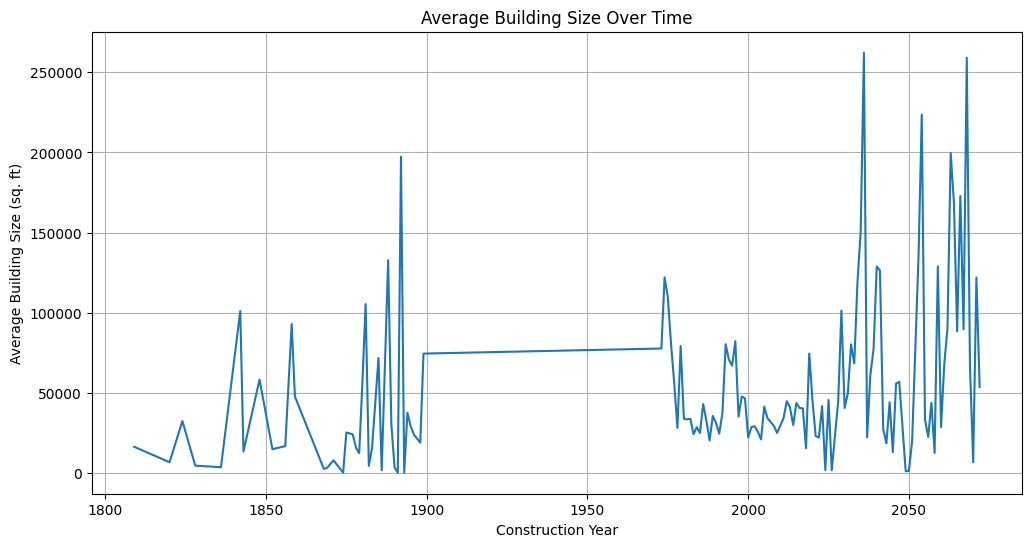

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
df = pd.read_csv('Construction Data.csv')  # Replace 'your_data_file.csv' with the actual file path

# Convert the "Construction Date" column to a datetime format
df['Construction Date'] = pd.to_datetime(df['Construction Date'], errors='coerce')

# Extract the year from the "Construction Date" column
df['Construction Year'] = df['Construction Date'].dt.year

# Group the data by the construction year and calculate the average building size
average_size_by_year = df.groupby('Construction Year')['Bldg ANSI Usable'].mean()

# Create a line chart to visualize the change in average building size over time
plt.figure(figsize=(12, 6))
average_size_by_year.plot(kind='line')
plt.title('Average Building Size Over Time')
plt.xlabel('Construction Year')
plt.ylabel('Average Building Size (sq. ft)')
plt.grid(True)
plt.show()

Anomaly Detection: Are there any outliers in the dataset? For example, extremely large or small buildings, or buildings with an unusually high number of people.

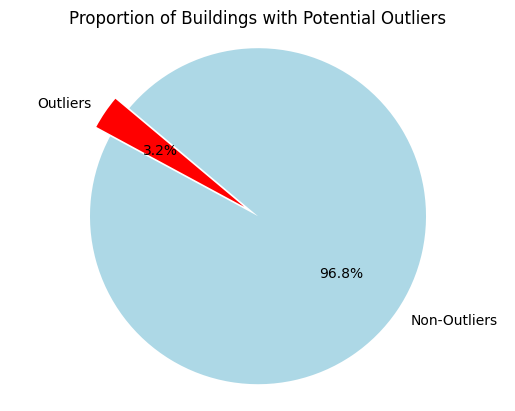

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
df = pd.read_csv('Construction Data.csv')  # Replace 'your_data_file.csv' with the actual file path

# Define a threshold for outliers (e.g., data points beyond 2 standard deviations from the mean)
threshold = 2

# Calculate the Z-scores for the "Bldg ANSI Usable" column
z_scores = (df['Bldg ANSI Usable'] - df['Bldg ANSI Usable'].mean()) / df['Bldg ANSI Usable'].std()

# Identify potential outliers
outliers = df[abs(z_scores) > threshold]

# Calculate the proportion of buildings with potential outliers
total_buildings = len(df)
outlier_buildings = len(outliers)
proportion_outliers = outlier_buildings / total_buildings

# Create a pie chart to visualize the proportion of buildings with potential outliers
labels = ['Outliers', 'Non-Outliers']
sizes = [proportion_outliers, 1 - proportion_outliers]
colors = ['red', 'lightblue']
explode = (0.1, 0)  # Explode the "Outliers" slice

plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Buildings with Potential Outliers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

What is the average size of buildings in each city?

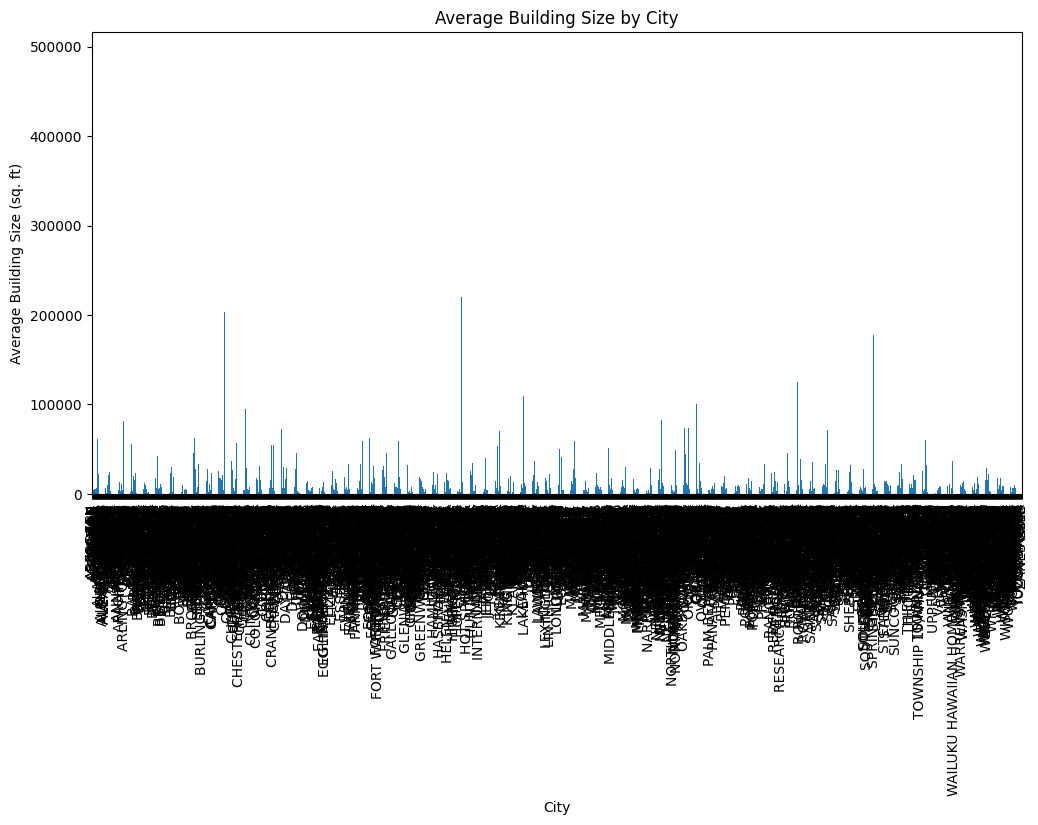

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
df = pd.read_csv('Construction Data.csv')  # Replace 'your_data_file.csv' with the actual file path

# Group the data by Bldg City and calculate the average of Bldg ANSI Usable
city_avg_building_size = df.groupby("Bldg City")["Bldg ANSI Usable"].mean()

# Create a bar chart to visualize the average building size in each city
city_avg_building_size.plot(kind='bar', figsize=(12, 6))
plt.title('Average Building Size by City')
plt.xlabel('City')
plt.ylabel('Average Building Size (sq. ft)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()